# HW08_Week11

## Question 1
1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

a. Classification decision tree adreesses to predict categorical outcomes, example of real-world applications would be healthcare, where it could help diagnose whether the patient ahs a disease, also in finances and marketing where it can help clssigy potential customer as likely to respond to a campaign ir a loan applicant will default based on credit history and income.

b. The classification trees are normally used to predict categorical outcomes, it uses a tree stucture and creates qualification for each branch and continues down to the qualified ones until it reaches the end. Multiple linear regression predicts coninues numerical values by fitting a linear equation and lines in a data. In the end, it compute numerical predictions using math equations. 

## Question 2
2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

    Accuracy measures the proportion of true results (both true positives and true negatives) in the population.

Scenario: Predicting on-time vs late delivery for an e-commerce platform
Accuracy is useful when both outcomes are equally important. Using our scenario, we can chack accuracy which reflects the model's overall correctness if we were to simulate that if 50% of deliveries are latye and the rest are on time. 

    Sensitivity measures the proportion of actual positives that are correctly identified.

Scenario: Diagnosing cancer using medical test
Sensitivity ensure most actual positives that are correctly identified. When it comes to mdeical testing, we want to priotize the capture of all psotives, even if it tolerates more false positives. Because missing even one cases could lead to horrible consequences. 
 

    Specificity measures the proportion of actual negatives that are correctly identified.

Scenario: Screening athltes fror doping in sports
Specificity ensures that clean athletes are not wrongly flagges as dopers, which is our true negatives. Accusing a innocent athelte can affect repotation and careerm, which this is our false positives, thus we want to minimize errors, even if some dopers are undetected. 


    Precision measures the proportion of positive identifications that were actually correct.


Scenario: Detecting fraudulent transaction in a bank
It focuses on minimizing the number of legitmate transaction falsely flagged as fraud, which is false psoitive. This is important to avoid those disruptions for cusatomers while ensuring flagges transactions are likely to be fraudulent. 

## Question 3
3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below
remove Weight_oz, Width, and Height
drop all remaining rows with NaN entries
set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category



In [17]:
# Imports already provided
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Remove rows with NaN values and create a copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert data types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")


## Question 4
Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model



In [18]:
from sklearn.model_selection import train_test_split

# 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")


Training set size: 255
Testing set size: 64


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]\nclass = Hardback'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]\nclass = Hardback'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]\nclass = Paperback')]

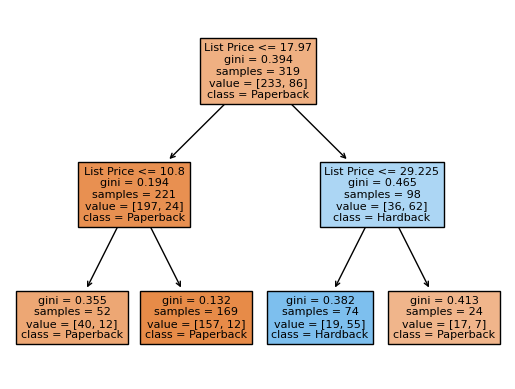

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Define the target variable (y) and the feature (X)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])["H"]  # 1 for Hardback, 0 for Paperback
X = ab_reduced_noNaN[["List Price"]]  # Feature: List Price

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X, y)

# Visualize the tree
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardback"], filled=True)


## Question 5
5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model



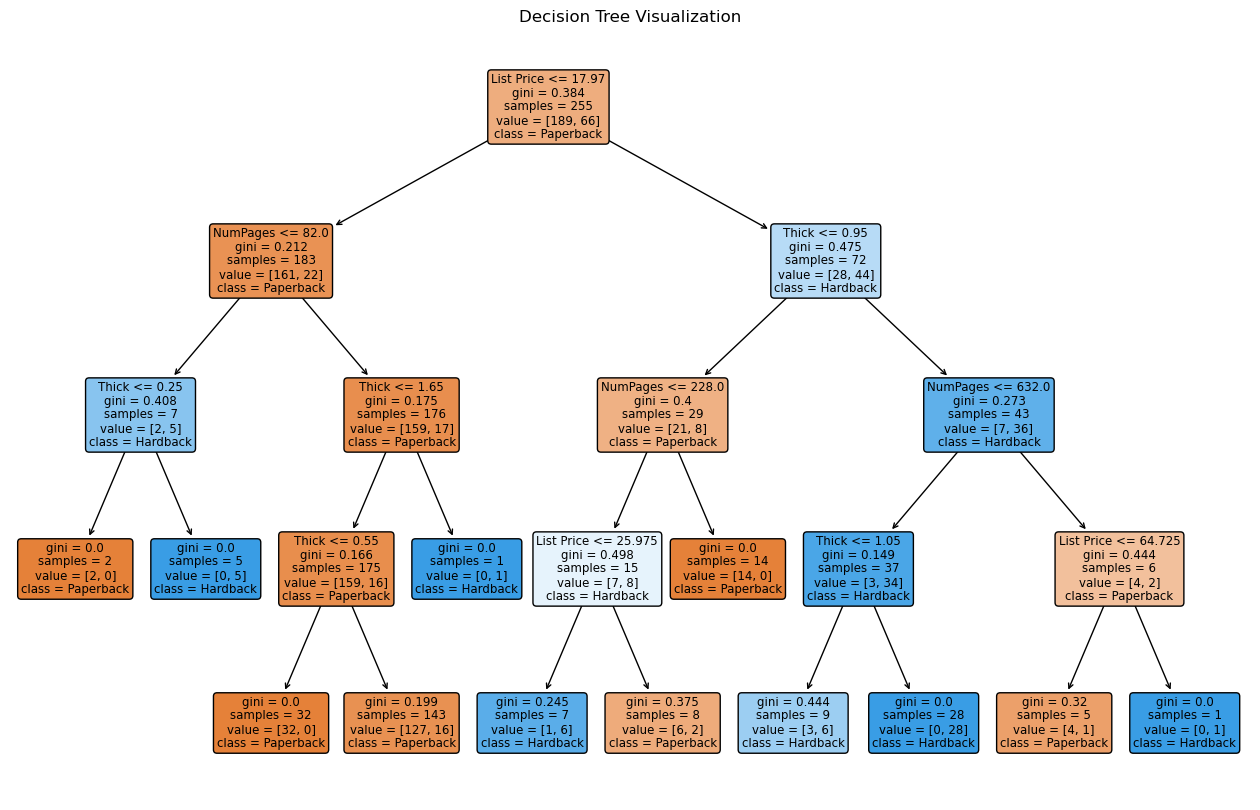

In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Preprocess the dataset
# Drop unwanted columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert columns to required data types using .loc
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Step 2: Train-test split (80/20)
train_data, test_data = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Step 3: Define target (y) and features (X) for clf2
y_train = pd.get_dummies(train_data["Hard_or_Paper"])["H"]  # 1 for Hardback, 0 for Paperback
X_train = train_data[["NumPages", "Thick", "List Price"]]

# Step 4: Initialize and train the DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Step 5: Visualize the tree using tree.plot_tree
plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf2,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paperback", "Hardback"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


## Question 6
Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

Model: clf (List Price)
Confusion Matrix:
[[40  4]
 [ 3 17]]
Sensitivity (Recall): 0.85
Specificity: 0.91
Accuracy: 0.89




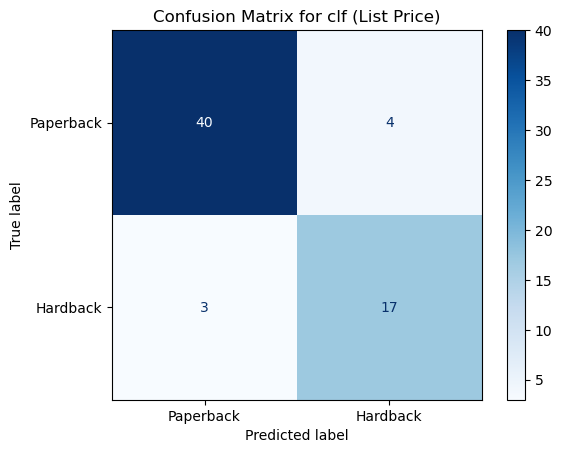

Model: clf2 (NumPages, Thick, List Price)
Confusion Matrix:
[[40  4]
 [ 5 15]]
Sensitivity (Recall): 0.75
Specificity: 0.91
Accuracy: 0.86




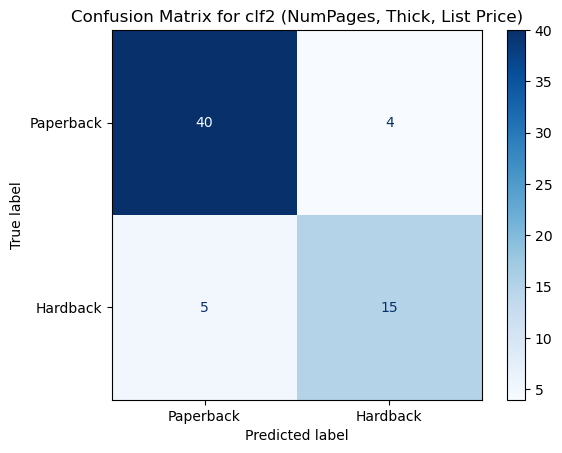

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Define the test data for both models
y_test = pd.get_dummies(test_data["Hard_or_Paper"])["H"]  # 1 for Hardback, 0 for Paperback

# Data for clf (using only "List Price")
X_test_clf = test_data[["List Price"]]

# Data for clf2 (using "NumPages," "Thick," and "List Price")
X_test_clf2 = test_data[["NumPages", "Thick", "List Price"]]

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Extract true negatives, false positives, false negatives, true positives
    sensitivity = tp / (tp + fn)  # Recall: True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    accuracy = accuracy_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Sensitivity (Recall): {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("\n")
    
    # Display confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paperback", "Hardback"]).plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate clf
evaluate_model(y_test, y_pred_clf, "clf (List Price)")

# Evaluate clf2
evaluate_model(y_test, y_pred_clf2, "clf2 (NumPages, Thick, List Price)")


## Question 7
7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better
    
    
    
    The first confusion matrix comes from a model that only looks at "List Price" variable to make decision whether the book is paperback or hardback which it limits the model since it doesn't provide enough information to capture more complex relationships in the data. The second confusion matrix comes from a model that considers variables NumPages, Thick and List Price which denmonstrates more details in data and increases the accuracy when it comes to making prediction. CLF and CLF2's confusion matrices are better because they are test on new datas, which is close to how it would present in real-world situations. By testing on new data, we can see whether or not the model overfitts to the training data that causes a mislead of analysis to pattern of new data. 
    

## Chatbot Summary

Data Preprocessing: Loaded the Amazon Books dataset, removed unnecessary columns, handled missing values, and converted data types as required.

Train-Test Split: Split the dataset into 80% training and 20% testing sets.

First Decision Tree (clf): Trained a DecisionTreeClassifier with "List Price" as the sole feature and visualized the tree using tree.plot_tree().

Second Decision Tree (clf2): Trained another DecisionTreeClassifier with multiple features ("NumPages," "Thick," and "List Price") and visualized the tree for better understanding.

Model Evaluation: Created confusion matrices for both models (clf and clf2) on the test set, calculating sensitivity, specificity, and accuracy.

Comparison: Explained the differences in performance between single-feature and multi-feature trees, emphasizing how additional features and testing on unseen data improve predictions.

https://chatgpt.com/share/673fd91f-1ae8-800a-9a21-2402fc08d25d